In [427]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

drive.mount('/content/drive')
dir_path = "/content/drive/My Drive/CMPE257_PROJECT/"
NVDA_path ='NVDA_hist.xlsx'
NVDQ_path ='NVDQ_hist.xlsx'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [428]:
file_path_nvda = dir_path  + NVDA_path
file_path_nvdaq = dir_path  + NVDQ_path

df_NVDA = pd.read_excel(file_path_nvda)
df_NVDAQ = pd.read_excel(file_path_nvdaq)


df_NVDA.index = pd.to_datetime(df_NVDA['Date'])
df_NVDAQ.index = pd.to_datetime(df_NVDAQ['Date'])

print(df_NVDA.head())
print(df_NVDAQ.head())

print("SHAPES")
print(df_NVDA.shape)
print(df_NVDAQ.shape)

                 Date    Open    High     Low   Close  Adj Close       Volume
Date                                                                         
2024-12-13 2024-12-13  138.94  139.60  132.54  134.25     134.25  230976400.0
2024-12-12 2024-12-12  137.08  138.44  135.80  137.34     137.34  159211400.0
2024-12-11 2024-12-11  137.36  140.17  135.21  139.31     139.31  184905200.0
2024-12-10 2024-12-10  139.01  141.82  133.79  135.07     135.07  210020900.0
2024-12-09 2024-12-09  138.97  139.95  137.13  138.81     138.81  189308600.0
                 Date  Open   High    Low  Close  Adj Close      Volume
Date                                                                   
2024-12-13 2024-12-13  3.29  3.620  3.260  3.530      3.530  65457800.0
2024-12-12 2024-12-12   3.4  3.450  3.325  3.380      3.380  39795900.0
2024-12-11 2024-12-11  3.38  3.500  3.240  3.280      3.280  62519900.0
2024-12-10 2024-12-10  3.32  3.564  3.180  3.500      3.500  57788000.0
2024-12-09 2024-12-09 

# Data Preprocessing

In [429]:
from sklearn.model_selection import train_test_split

# break down date column into month and day
df_NVDA['Month'] = df_NVDA['Date'].dt.month
df_NVDA['Day_month'] = df_NVDA['Date'].dt.day
df_NVDA["Day_week"] = df_NVDA['Date'].dt.dayofweek

df_NVDAQ['Month'] = df_NVDAQ['Date'].dt.month
df_NVDAQ['Day_month'] = df_NVDAQ['Date'].dt.day
df_NVDAQ["Day_week"] = df_NVDAQ['Date'].dt.dayofweek

# drop columns
df_NVDA.drop('Date',axis=1,inplace=True)
df_NVDAQ.drop('Date',axis=1,inplace=True)

# drop NaN (for stock splits and dividend)
df_NVDA.dropna(inplace=True)
df_NVDAQ.dropna(inplace=True)

# check column types
print(df_NVDA.dtypes)
print(df_NVDAQ.dtypes)

Open          object
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
Month          int32
Day_month      int32
Day_week       int32
dtype: object
Open          object
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
Month          int32
Day_month      int32
Day_week       int32
dtype: object


In [430]:
# change 'Open' type to float
df_NVDA["Open"]= df_NVDA["Open"].astype(float)
df_NVDAQ["Open"]= df_NVDAQ["Open"].astype(float)
df_NVDA.head()

,Open,High,Low,Close,Adj Close,Volume,Month,Day_month,Day_week
Date,,,,,,,,,
2024-12-13,138.94,139.60,132.54,134.25,134.25,230976400.0,12,13,4
2024-12-12,137.08,138.44,135.80,137.34,137.34,159211400.0,12,12,3
2024-12-11,137.36,140.17,135.21,139.31,139.31,184905200.0,12,11,2
2024-12-10,139.01,141.82,133.79,135.07,135.07,210020900.0,12,10,1
2024-12-09,138.97,139.95,137.13,138.81,138.81,189308600.0,12,9,0


In [431]:
# rearranging column orders
df_NVDA  = df_NVDA[['High','Low','Close','Adj Close','Volume','Month','Day_month','Day_week','Open']]
df_NVDAQ = df_NVDAQ[['High','Low','Close','Adj Close','Volume','Month','Day_month','Day_week','Open']]
df_NVDA.head()

,High,Low,Close,Adj Close,Volume,Month,Day_month,Day_week,Open
Date,,,,,,,,,
2024-12-13,139.60,132.54,134.25,134.25,230976400.0,12,13,4,138.94
2024-12-12,138.44,135.80,137.34,137.34,159211400.0,12,12,3,137.08
2024-12-11,140.17,135.21,139.31,139.31,184905200.0,12,11,2,137.36
2024-12-10,141.82,133.79,135.07,135.07,210020900.0,12,10,1,139.01
2024-12-09,139.95,137.13,138.81,138.81,189308600.0,12,9,0,138.97


In [432]:
# test range of data time periods

# 1st option : Leave loaded dataset as is (use data from 2023)

# 2nd option : reduce dataset

df_NVDA.sort_index(inplace=True)
df_NVDAQ.sort_index(inplace=True)
df_NVDA.drop(df_NVDA.index[:195], inplace=True)
df_NVDAQ.drop(df_NVDAQ.index[:195], inplace=True)
df_NVDAQ.head()

,High,Low,Close,Adj Close,Volume,Month,Day_month,Day_week,Open
Date,,,,,,,,,
2024-08-01,7.000,5.650,6.73,6.73,26060900.0,8,1,3,5.90
2024-08-02,7.745,6.835,7.01,7.01,24362700.0,8,2,4,7.47
2024-08-05,9.190,7.521,7.87,7.87,25288000.0,8,5,0,8.97
2024-08-06,7.895,6.760,7.34,7.34,18236800.0,8,6,1,7.38
2024-08-07,8.100,6.681,8.10,8.10,14705900.0,8,7,2,6.83


In [433]:
df_NVDA.head()

,High,Low,Close,Adj Close,Volume,Month,Day_month,Day_week,Open
Date,,,,,,,,,
2024-08-01,120.16,106.81,109.21,109.19,523462300.0,8,1,3,117.53
2024-08-02,108.72,101.37,107.27,107.25,482027500.0,8,2,4,103.76
2024-08-05,103.41,90.69,100.45,100.43,552842400.0,8,5,0,92.06
2024-08-06,107.71,100.55,104.25,104.23,409012100.0,8,6,1,103.84
2024-08-07,108.80,98.69,98.91,98.89,411440400.0,8,7,2,107.81


## Targets are high, low, close

# Split Train and Test

In [434]:
from sklearn.preprocessing import MinMaxScaler

slide = 5


def create_datasets(df_array,slide):
  X= []
  y= []
  for i in range(len(df_array)-slide):
    X.append([r for r in df_array[i:i+slide]])
    y.append([df_array[i+slide][0],df_array[i+slide][1], df_array[i+slide][2], df_array[i+slide][3], df_array[i+slide][4], df_array[i+slide][5] , df_array[i+slide][6],df_array[i+slide][7],df_array[i+slide][8]])
  X_array= np.array(X)
  y_array= np.array(y)
  return X_array, y_array


df_NVDA_array = df_NVDA.to_numpy()
df_NVDAQ_array = df_NVDAQ.to_numpy()

X_NVDA,y_NVDA =create_datasets(df_NVDA_array,slide)
X_NVDAQ,y_NVDAQ =create_datasets(df_NVDAQ_array,slide)


print("X NVDA SHAPE", X_NVDA.shape)
print("y NVDA SHAPE", y_NVDA.shape)
print()
print("X NVDAQ SHAPE", X_NVDAQ.shape)
print("X NVDAQ SHAPE", y_NVDAQ.shape)


# splitting into train and test
X_train_NVDA, X_test_NVDA, y_train_NVDA, y_test_NVDA = train_test_split(X_NVDA, y_NVDA, test_size=0.2, shuffle=False)
X_train_NVDAQ, X_test_NVDAQ, y_train_NVDAQ, y_test_NVDAQ = train_test_split(X_NVDAQ, y_NVDAQ, test_size=0.2, shuffle=False)

# Normalize
max_high_NVDA = X_train_NVDA[:,:,0].max()
min_high_NVDA = X_train_NVDA[:,:,0].min()

max_low_NVDA = X_train_NVDA[:,:,1].max()
min_low_NVDA = X_train_NVDA[:,:,1].min()

max_close_NVDA = X_train_NVDA[:,:,2].max()
min_close_NVDA = X_train_NVDA[:,:,2].min()

max_adj_close_NVDA = X_train_NVDA[:,:,3].max()
min_adj_close_NVDA = X_train_NVDA[:,:,3].min()

max_volume_NVDA = X_train_NVDA[:,:,4].max()
min_volume_NVDA = X_train_NVDA[:,:,4].min()

max_month_NVDA = X_train_NVDA[:,:,5].max()
min_month_NVDA = X_train_NVDA[:,:,5].min()

max_day_month_NVDA = X_train_NVDA[:,:,6].max()
min_day_month_NVDA = X_train_NVDA[:,:,6].min()

max_day_week_NVDA = X_train_NVDA[:,:,7].max()
min_day_week_NVDA = X_train_NVDA[:,:,7].min()

max_open_NVDA = X_train_NVDA[:,:,8].max()
min_open_NVDA = X_train_NVDA[:,:,8].min()




X_train_NVDA[:,:,0]=(X_train_NVDA[:,:,0] - min_high_NVDA)/(max_high_NVDA - min_high_NVDA)
X_train_NVDA[:,:,1]=(X_train_NVDA[:,:,1] - min_low_NVDA)/(max_low_NVDA - min_low_NVDA)
X_train_NVDA[:,:,2]=(X_train_NVDA[:,:,2] - min_close_NVDA)/(max_close_NVDA - min_close_NVDA)
X_train_NVDA[:,:,3]=(X_train_NVDA[:,:,3] - min_adj_close_NVDA)/(max_adj_close_NVDA - min_adj_close_NVDA)
X_train_NVDA[:,:,4]=(X_train_NVDA[:,:,4] - min_volume_NVDA)/(max_volume_NVDA - min_volume_NVDA)
X_train_NVDA[:,:,5]=(X_train_NVDA[:,:,5] - min_month_NVDA)/(max_month_NVDA - min_month_NVDA)
X_train_NVDA[:,:,6]=(X_train_NVDA[:,:,6] - min_day_month_NVDA)/(max_day_month_NVDA - min_day_month_NVDA)
X_train_NVDA[:,:,7]=(X_train_NVDA[:,:,7] - min_day_week_NVDA)/(max_day_week_NVDA - min_day_week_NVDA)
X_train_NVDA[:,:,8]=(X_train_NVDA[:,:,8] - min_open_NVDA)/(max_open_NVDA - min_open_NVDA)


X_test_NVDA[:,:,0]=(X_test_NVDA[:,:,0] - min_high_NVDA)/(max_high_NVDA - min_high_NVDA)
X_test_NVDA[:,:,1]=(X_test_NVDA[:,:,1] - min_low_NVDA)/(max_low_NVDA - min_low_NVDA)
X_test_NVDA[:,:,2]=(X_test_NVDA[:,:,2] - min_close_NVDA)/(max_close_NVDA - min_close_NVDA)
X_test_NVDA[:,:,3]=(X_test_NVDA[:,:,3] - min_adj_close_NVDA)/(max_adj_close_NVDA - min_adj_close_NVDA)
X_test_NVDA[:,:,4]=(X_test_NVDA[:,:,4] - min_volume_NVDA)/(max_volume_NVDA - min_volume_NVDA)
X_test_NVDA[:,:,5]=(X_test_NVDA[:,:,5] - min_month_NVDA)/(max_month_NVDA - min_month_NVDA)
X_test_NVDA[:,:,6]=(X_test_NVDA[:,:,6] - min_day_month_NVDA)/(max_day_month_NVDA - min_day_month_NVDA)
X_test_NVDA[:,:,7]=(X_test_NVDA[:,:,7] - min_day_week_NVDA)/(max_day_week_NVDA - min_day_week_NVDA)
X_test_NVDA[:,:,8]=(X_test_NVDA[:,:,8] - min_open_NVDA)/(max_open_NVDA - min_open_NVDA)

y_train_NVDA[:,0]=(y_train_NVDA[:,0]- min_high_NVDA)/(max_high_NVDA - min_high_NVDA)
y_train_NVDA[:,1]=(y_train_NVDA[:,1]- min_low_NVDA)/(max_low_NVDA - min_low_NVDA)
y_train_NVDA[:,2]=(y_train_NVDA[:,2]- min_close_NVDA)/(max_close_NVDA - min_close_NVDA)
y_train_NVDA[:,3]=(y_train_NVDA[:,3]- min_adj_close_NVDA)/(max_adj_close_NVDA - min_adj_close_NVDA)
y_train_NVDA[:,4]=(y_train_NVDA[:,4]- min_volume_NVDA)/(max_volume_NVDA - min_volume_NVDA)
y_train_NVDA[:,5]=(y_train_NVDA[:,5]- min_month_NVDA)/(max_month_NVDA - min_month_NVDA)
y_train_NVDA[:,6]=(y_train_NVDA[:,6]- min_day_month_NVDA)/(max_day_month_NVDA - min_day_month_NVDA)
y_train_NVDA[:,7]=(y_train_NVDA[:,7]- min_day_week_NVDA)/(max_day_week_NVDA - min_day_week_NVDA)
y_train_NVDA[:,8]=(y_train_NVDA[:,8]- min_open_NVDA)/(max_open_NVDA - min_open_NVDA)


y_test_NVDA[:,0]=(y_test_NVDA[:,0]- min_high_NVDA)/(max_high_NVDA - min_high_NVDA)
y_test_NVDA[:,1]=(y_test_NVDA[:,1]- min_low_NVDA)/(max_low_NVDA - min_low_NVDA)
y_test_NVDA[:,2]=(y_test_NVDA[:,2]- min_close_NVDA)/(max_close_NVDA - min_close_NVDA)
y_test_NVDA[:,3]=(y_test_NVDA[:,3]- min_adj_close_NVDA)/(max_adj_close_NVDA - min_adj_close_NVDA)
y_test_NVDA[:,4]=(y_test_NVDA[:,4]- min_volume_NVDA)/(max_volume_NVDA - min_volume_NVDA)
y_test_NVDA[:,5]=(y_test_NVDA[:,5]- min_month_NVDA)/(max_month_NVDA - min_month_NVDA)
y_test_NVDA[:,6]=(y_test_NVDA[:,6]- min_day_month_NVDA)/(max_day_month_NVDA - min_day_month_NVDA)
y_test_NVDA[:,7]=(y_test_NVDA[:,7]- min_day_week_NVDA)/(max_day_week_NVDA - min_day_week_NVDA)
y_test_NVDA[:,8]=(y_test_NVDA[:,8]- min_open_NVDA)/(max_open_NVDA - min_open_NVDA)







max_high_NVDAQ = X_train_NVDAQ[:,:,0].max()
min_high_NVDAQ = X_train_NVDAQ[:,:,0].min()

max_low_NVDAQ = X_train_NVDAQ[:,:,1].max()
min_low_NVDAQ = X_train_NVDAQ[:,:,1].min()

max_close_NVDAQ = X_train_NVDAQ[:,:,2].max()
min_close_NVDAQ = X_train_NVDAQ[:,:,2].min()

max_adj_close_NVDAQ = X_train_NVDAQ[:,:,3].max()
min_adj_close_NVDAQ = X_train_NVDAQ[:,:,3].min()

max_volume_NVDAQ = X_train_NVDAQ[:,:,4].max()
min_volume_NVDAQ = X_train_NVDAQ[:,:,4].min()

max_month_NVDAQ = X_train_NVDAQ[:,:,5].max()
min_month_NVDAQ = X_train_NVDAQ[:,:,5].min()

max_day_month_NVDAQ = X_train_NVDAQ[:,:,6].max()
min_day_month_NVDAQ = X_train_NVDAQ[:,:,6].min()

max_day_week_NVDAQ = X_train_NVDAQ[:,:,7].max()
min_day_week_NVDAQ = X_train_NVDAQ[:,:,7].min()

max_open_NVDAQ = X_train_NVDAQ[:,:,8].max()
min_open_NVDAQ = X_train_NVDAQ[:,:,8].min()


X_train_NVDAQ[:,:,0]=(X_train_NVDAQ[:,:,0] - min_high_NVDAQ)/(max_high_NVDAQ - min_high_NVDAQ)
X_train_NVDAQ[:,:,1]=(X_train_NVDAQ[:,:,1] - min_low_NVDAQ)/(max_low_NVDAQ - min_low_NVDAQ)
X_train_NVDAQ[:,:,2]=(X_train_NVDAQ[:,:,2] - min_close_NVDAQ)/(max_close_NVDAQ - min_close_NVDAQ)
X_train_NVDAQ[:,:,3]=(X_train_NVDAQ[:,:,3] - min_adj_close_NVDAQ)/(max_adj_close_NVDAQ - min_adj_close_NVDAQ)
X_train_NVDAQ[:,:,4]=(X_train_NVDAQ[:,:,4] - min_volume_NVDAQ)/(max_volume_NVDAQ - min_volume_NVDAQ)
X_train_NVDAQ[:,:,5]=(X_train_NVDAQ[:,:,5] - min_month_NVDAQ)/(max_month_NVDAQ - min_month_NVDAQ)
X_train_NVDAQ[:,:,6]=(X_train_NVDAQ[:,:,6] - min_day_month_NVDAQ)/(max_day_month_NVDAQ - min_day_month_NVDAQ)
X_train_NVDAQ[:,:,7]=(X_train_NVDAQ[:,:,7] - min_day_week_NVDAQ)/(max_day_week_NVDAQ - min_day_week_NVDAQ)
X_train_NVDAQ[:,:,8]=(X_train_NVDAQ[:,:,8] - min_open_NVDAQ)/(max_open_NVDAQ - min_open_NVDAQ)


X_test_NVDAQ[:,:,0]=(X_test_NVDAQ[:,:,0] - min_high_NVDAQ)/(max_high_NVDAQ - min_high_NVDAQ)
X_test_NVDAQ[:,:,1]=(X_test_NVDAQ[:,:,1] - min_low_NVDAQ)/(max_low_NVDAQ - min_low_NVDAQ)
X_test_NVDAQ[:,:,2]=(X_test_NVDAQ[:,:,2] - min_close_NVDAQ)/(max_close_NVDAQ - min_close_NVDAQ)
X_test_NVDAQ[:,:,3]=(X_test_NVDAQ[:,:,3] - min_adj_close_NVDAQ)/(max_adj_close_NVDAQ - min_adj_close_NVDAQ)
X_test_NVDAQ[:,:,4]=(X_test_NVDAQ[:,:,4] - min_volume_NVDAQ)/(max_volume_NVDAQ - min_volume_NVDAQ)
X_test_NVDAQ[:,:,5]=(X_test_NVDAQ[:,:,5] - min_month_NVDAQ)/(max_month_NVDAQ - min_month_NVDAQ)
X_test_NVDAQ[:,:,6]=(X_test_NVDAQ[:,:,6] - min_day_month_NVDAQ)/(max_day_month_NVDAQ - min_day_month_NVDAQ)
X_test_NVDAQ[:,:,7]=(X_test_NVDAQ[:,:,7] - min_day_week_NVDAQ)/(max_day_week_NVDAQ - min_day_week_NVDAQ)
X_test_NVDAQ[:,:,8]=(X_test_NVDAQ[:,:,8] - min_open_NVDAQ)/(max_open_NVDAQ - min_open_NVDAQ)

y_train_NVDAQ[:,0]=(y_train_NVDAQ[:,0]- min_high_NVDAQ)/(max_high_NVDAQ - min_high_NVDAQ)
y_train_NVDAQ[:,1]=(y_train_NVDAQ[:,1]- min_low_NVDAQ)/(max_low_NVDAQ - min_low_NVDAQ)
y_train_NVDAQ[:,2]=(y_train_NVDAQ[:,2]- min_close_NVDAQ)/(max_close_NVDAQ - min_close_NVDAQ)
y_train_NVDAQ[:,3]=(y_train_NVDAQ[:,3]- min_adj_close_NVDAQ)/(max_adj_close_NVDAQ - min_adj_close_NVDAQ)
y_train_NVDAQ[:,4]=(y_train_NVDAQ[:,4]- min_volume_NVDAQ)/(max_volume_NVDAQ - min_volume_NVDAQ)
y_train_NVDAQ[:,5]=(y_train_NVDAQ[:,5]- min_month_NVDAQ)/(max_month_NVDAQ - min_month_NVDAQ)
y_train_NVDAQ[:,6]=(y_train_NVDAQ[:,6]- min_day_month_NVDAQ)/(max_day_month_NVDAQ - min_day_month_NVDAQ)
y_train_NVDAQ[:,7]=(y_train_NVDAQ[:,7]- min_day_week_NVDAQ)/(max_day_week_NVDAQ - min_day_week_NVDAQ)
y_train_NVDAQ[:,8]=(y_train_NVDAQ[:,8]- min_open_NVDAQ)/(max_open_NVDAQ - min_open_NVDAQ)


y_test_NVDAQ[:,0]=(y_test_NVDAQ[:,0]- min_high_NVDAQ)/(max_high_NVDAQ - min_high_NVDAQ)
y_test_NVDAQ[:,1]=(y_test_NVDAQ[:,1]- min_low_NVDAQ)/(max_low_NVDAQ - min_low_NVDAQ)
y_test_NVDAQ[:,2]=(y_test_NVDAQ[:,2]- min_close_NVDAQ)/(max_close_NVDAQ - min_close_NVDAQ)
y_test_NVDAQ[:,3]=(y_test_NVDAQ[:,3]- min_adj_close_NVDAQ)/(max_adj_close_NVDAQ - min_adj_close_NVDAQ)
y_test_NVDAQ[:,4]=(y_test_NVDAQ[:,4]- min_volume_NVDAQ)/(max_volume_NVDAQ - min_volume_NVDAQ)
y_test_NVDAQ[:,5]=(y_test_NVDAQ[:,5]- min_month_NVDAQ)/(max_month_NVDAQ - min_month_NVDAQ)
y_test_NVDAQ[:,6]=(y_test_NVDAQ[:,6]- min_day_month_NVDAQ)/(max_day_month_NVDAQ - min_day_month_NVDAQ)
y_test_NVDAQ[:,7]=(y_test_NVDAQ[:,7]- min_day_week_NVDAQ)/(max_day_week_NVDAQ - min_day_week_NVDAQ)
y_test_NVDAQ[:,8]=(y_test_NVDAQ[:,8]- min_open_NVDAQ)/(max_open_NVDAQ - min_open_NVDAQ)





print()
print("X_train NVDA SHAPE ",X_train_NVDA.shape)
print("y_train NVDA SHAPE ",y_train_NVDA.shape)
print("X_test NVDAQ SHAPE ",X_test_NVDAQ.shape)
print("y_test NVDAQ SHAPE ",y_test_NVDAQ.shape)

X NVDA SHAPE (90, 5, 9)
y NVDA SHAPE (90, 9)

X NVDAQ SHAPE (90, 5, 9)
X NVDAQ SHAPE (90, 9)

X_train NVDA SHAPE  (72, 5, 9)
y_train NVDA SHAPE  (72, 9)
X_test NVDAQ SHAPE  (18, 5, 9)
y_test NVDAQ SHAPE  (18, 9)


# Split

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - loss: 0.3702 - mae: 0.5295
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2663 - mae: 0.4433 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1795 - mae: 0.3594 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1129 - mae: 0.2840  
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0617 - mae: 0.2011 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0490 - mae: 0.1636 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0592 - mae: 0.1903 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0551 - mae: 0.1825 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0457 - mae: 0.1575 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0408 - mae: 0.1461 
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0391 - mae: 0.1492 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0386 - mae: 0.1495 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss:

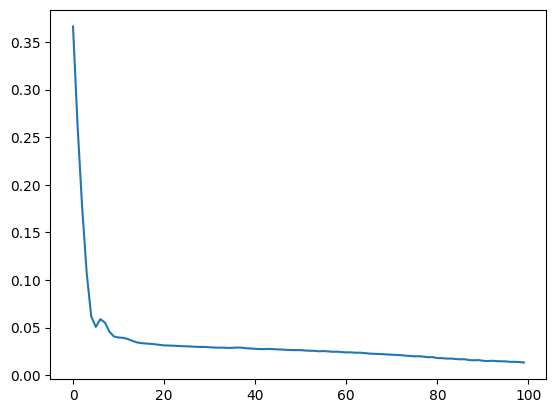

In [435]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM


input = 5
features = 9

model = Sequential()
model.add(LSTM(100, activation = 'tanh', input_shape = (input,features)))
model.add(Dense(9))
model.compile(optimizer='adam',loss='mse', metrics=['mae'])
model.fit(X_train_NVDA, y_train_NVDA , epochs=100)
loss= model.history.history['loss']
plt.plot(loss)



Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1938 - mae: 0.3399
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1370 - mae: 0.2755 
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0970 - mae: 0.2302 
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0664 - mae: 0.1906 
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0511 - mae: 0.1745 
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0483 - mae: 0.1732 
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0454 - mae: 0.1680 
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0393 - mae: 0.1497 
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0351 - mae: 0.1334 
Epoch 10/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0318 - mae: 0.1219
Epoch 11/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0322 - mae: 0.1211 
Epoch 12/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0316 - mae: 0.1201 
Epoch 13/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

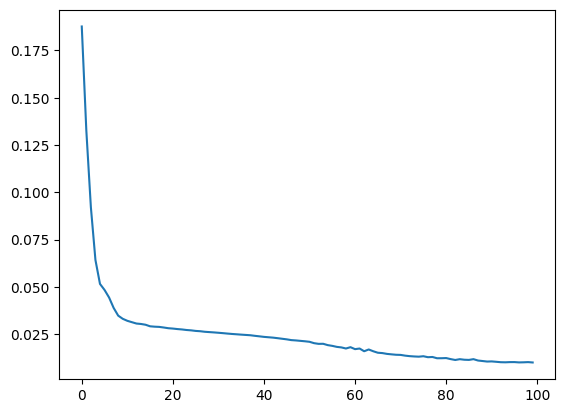

In [436]:

model2 = Sequential()
model2.add(LSTM(100, activation = 'tanh', input_shape = (input,features)))
model2.add(Dense(9))
model2.compile(optimizer='adam',loss='mse', metrics=['mae'])
model2.fit(X_train_NVDAQ, y_train_NVDAQ , epochs=100)
loss= model2.history.history['loss']
plt.plot(loss)

In [437]:

error = model.evaluate(X_test_NVDA,y_test_NVDA)
print("NVDA",error)

error2 = model2.evaluate(X_test_NVDAQ,y_test_NVDAQ)
print("NVDAQ",error2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step - loss: 0.0285 - mae: 0.1254
NVDA [0.028518280014395714, 0.12537437677383423]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - loss: 0.0389 - mae: 0.1195
NVDAQ [0.038897160440683365, 0.11945916712284088]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


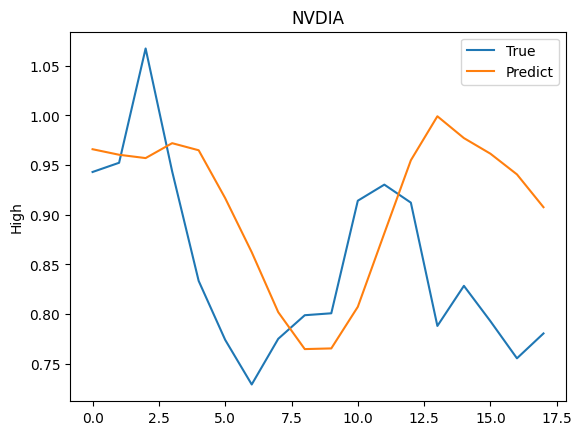

In [438]:
predictions = model.predict(X_test_NVDA)
plt.plot(y_test_NVDA[:, 0], label='True ')
plt.plot(predictions[:, 0], label='Predict')
plt.title("NVDIA")
plt.ylabel("High")
plt.legend()
plt.show()


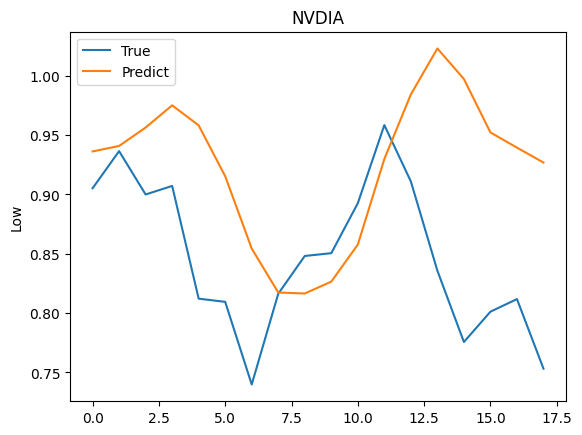

In [439]:
plt.plot(y_test_NVDA[:, 1], label='True ')
plt.plot(predictions[:, 1], label='Predict')
plt.title("NVDIA")
plt.ylabel("Low")
plt.legend()
plt.show()

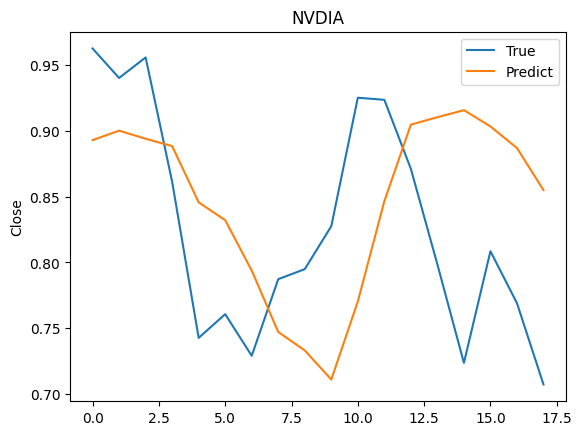

In [440]:
plt.plot(y_test_NVDA[:, 2], label='True ')
plt.plot(predictions[:, 2], label='Predict')
plt.title("NVDIA")
plt.ylabel("Close")
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


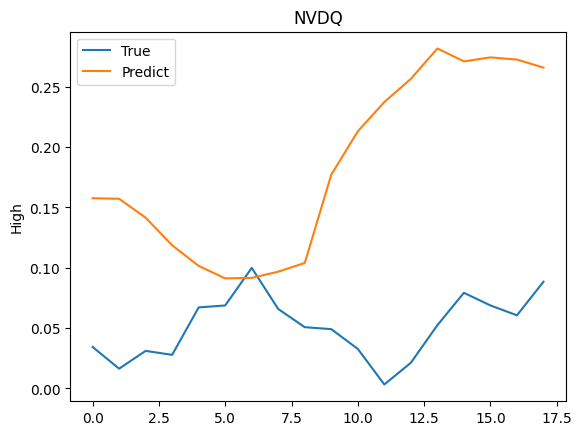

In [441]:
predictions = model.predict(X_test_NVDAQ)
plt.plot(y_test_NVDAQ[:, 0], label='True ')
plt.plot(predictions[:, 0], label='Predict')
plt.title("NVDQ")
plt.ylabel("High")
plt.legend()
plt.show()

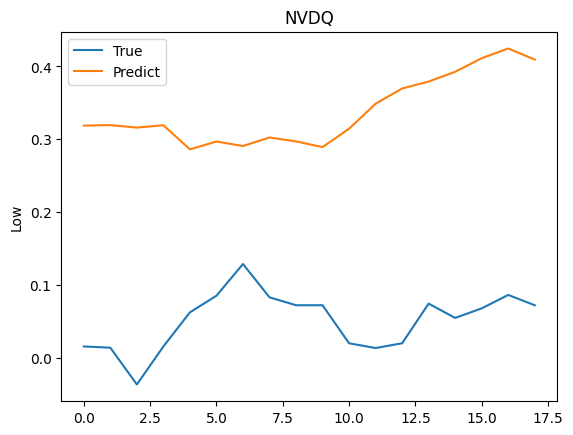

In [442]:
plt.plot(y_test_NVDAQ[:, 1], label='True ')
plt.plot(predictions[:, 1], label='Predict')
plt.title("NVDQ")
plt.ylabel("Low")
plt.legend()
plt.show()

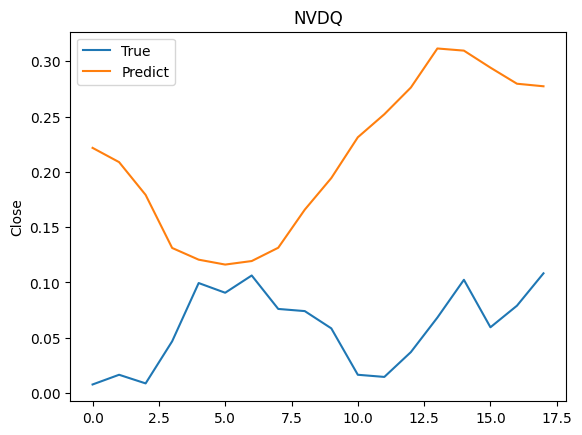

In [443]:
plt.plot(y_test_NVDAQ[:, 2], label='True ')
plt.plot(predictions[:, 2], label='Predict')
plt.title("NVDQ")
plt.ylabel("Close")
plt.legend()
plt.show()

In [444]:
def revertNorm_NVDA(pred_data):
  pred_data = np.array(pred_data)
  pred_data = pred_data.squeeze(axis=1)
  pred_data[:,0] = pred_data[:,0] * (max_high_NVDA - min_high_NVDA) + min_high_NVDA
  pred_data[:,1] = pred_data[:,1] * (max_low_NVDA - min_low_NVDA) + min_low_NVDA
  pred_data[:,2] = pred_data[:,2] * (max_close_NVDA - min_close_NVDA) + min_close_NVDA
  pred_data[:,3] = pred_data[:,3] * (max_adj_close_NVDA - min_adj_close_NVDA) + min_adj_close_NVDA
  pred_data[:,4] = pred_data[:,4] * (max_volume_NVDA - min_volume_NVDA) + min_volume_NVDA
  pred_data[:,5] = pred_data[:,5] * (max_month_NVDA - min_month_NVDA) + min_month_NVDA
  pred_data[:,6] = pred_data[:,6] * (max_day_month_NVDA - min_day_month_NVDA) + min_day_month_NVDA
  pred_data[:,7] = pred_data[:,7] * (max_day_week_NVDA - min_day_week_NVDA) + min_day_week_NVDA
  pred_data[:,8] = pred_data[:,8] * (max_open_NVDA - min_open_NVDA) + min_open_NVDA
  return pred_data

def revertNorm_NVDQ(pred_data):
  pred_data = np.array(pred_data)
  pred_data = pred_data.squeeze(axis=1)
  pred_data[:,0] = pred_data[:,0] * (max_high_NVDAQ - min_high_NVDAQ) + min_high_NVDAQ
  pred_data[:,1] = pred_data[:,1] * (max_low_NVDAQ - min_low_NVDAQ) + min_low_NVDAQ
  pred_data[:,2] = pred_data[:,2] * (max_close_NVDAQ - min_close_NVDAQ) + min_close_NVDAQ
  pred_data[:,3] = pred_data[:,3] * (max_adj_close_NVDAQ - min_adj_close_NVDAQ) + min_adj_close_NVDAQ
  pred_data[:,4] = pred_data[:,4] * (max_volume_NVDAQ - min_volume_NVDAQ) + min_volume_NVDAQ
  pred_data[:,5] = pred_data[:,5] * (max_month_NVDAQ - min_month_NVDAQ) + min_month_NVDAQ
  pred_data[:,6] = pred_data[:,6] * (max_day_month_NVDAQ - min_day_month_NVDAQ) + min_day_month_NVDAQ
  pred_data[:,7] = pred_data[:,7] * (max_day_week_NVDAQ - min_day_week_NVDAQ) + min_day_week_NVDAQ
  pred_data[:,8] = pred_data[:,8] * (max_open_NVDAQ - min_open_NVDAQ) + min_open_NVDAQ
  return pred_data

In [445]:
# function to get the future days, days_ahead gives the number of days predicted
def predict_future_NVDA(X_test_data, input=5, days_ahead=5):
  next_5 = []
  #print("X_test_NVDA Shape", X_test_NVDA.shape)
  last = X_test_data[-input:][-1]
  #print("SHAPE OF X_test_NVDA[-input:][-1]", last.shape)

  batch =  last.reshape(1,input,features)
  for i in range(0,days_ahead):
    pred = model.predict(batch)

    next_5.append(pred)

    batch = np.append(batch[:,1:,:], pred.reshape(1,1, features), axis=1)
  return revertNorm_NVDA(next_5)

# function to get the future days, days_ahead gives the number of days predicted
def predict_future_NVDQ(X_test_data, input=5, days_ahead=5):
  next_5 = []
  #print("X_test_NVDA Shape", X_test_NVDA.shape)
  last = X_test_data[-input:][-1]
  #print("SHAPE OF X_test_NVDA[-input:][-1]", last.shape)

  batch =  last.reshape(1,input,features)
  for i in range(0,days_ahead):
    pred = model.predict(batch)

    next_5.append(pred)

    batch = np.append(batch[:,1:,:], pred.reshape(1,1, features), axis=1)
  return revertNorm_NVDQ(next_5)


In [446]:
NVDA_future = predict_future_NVDA(X_test_NVDA, input=5, days_ahead=5)
print(NVDA_future)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[[ 1.45487701e+02  1.42195831e+02  1.41630692e+02  1.44027634e+02
   1.37696000e+08  1.23648529e+01  3.11809397e+00  2.46907878e+00
   1.43206436e+02]
 [ 1.45166168e+02  1.44112061e+02  1.40918839e+02  1.44013428e+02
   1.30468808e+08  1.23089314e+01  7.95799255e-01 -2.46109411e-01
   1.42334518e+02]
 [ 1.45881409e+02  1.44616028e+02  1.43134094e+02  1.45806580e+02
   1.41500544e+08  1.23082294e+01 -1.32502437e-01  8.60357463e-01
   1.44689117e+02]
 [ 1.48148682e+02  1.45759048e+02  1.45141052e+02  1.48142929e+02
   1.36930544e+08  1.24266243e+01 -1.46185970e+00  2.02660513e+00
   1.46854660e+02]
 [ 1.50406693e+02  1.47371796e+02  1.46752319e+02  1.50320877e+02
   1.27207224e+08  1.25500183e+01 -2.73929739e+00  2.57129121e+00
   1.48767792e+02]]


In [447]:
NVDQ_future = predict_future_NVDQ(X_test_NVDAQ, input=5, days_ahead=5)
print(NVDQ_future)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
[[       4.70389          4.8097515        4.3966393        4.3503356
  12234233.              12.066239        -8.111895         2.5114672
         4.7228117]
 [       5.1246767        4.850914         4.73652          4.6868725
   9747236.              11.946003        -9.191662         0.736102
         4.825301 ]
 [       5.540998         5.076306         5.1731505        5.0971966
  10972458.              11.910923        -8.858285         1.3864893
         5.3059807]
 [       6.114127         5.460972         5.7105384        5.614423
  10817533.              11.885582        -8.124385         1.9335377
         5.8915634]
 [       6.769337         5.935504         6.2618513        6.1758327
   9863960.              11.81221         -6.4961395        1.9844342
         6.526299 ]]
